In [2]:
#importing all the essential libraries first :
# Libraries for file and directory operations
import os
import shutil
import glob
import random
import zipfile
# avoid warnings
import warnings 
warnings. filterwarnings('ignore')
# Library for data processing
import numpy as np
import math
import pandas as pd
# Libraries for data visualization
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
from PIL import Image
# Libraries for deep learning model
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from keras.layers import BatchNormalization
from tensorflow.keras.layers import Dense, Flatten, Conv2D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
 #defining the extracted path to the zip file  
zip_path = 'C:/Users/kunja/fruits-360_100x100.zip'
extract_path = 'C:/Users/kunja/fruits-360_100x100/'

#extract :
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [4]:
#Loading the dataset 
training_folder_path = 'C:/Users/kunja/fruits-360_100x100/fruits-360/Training'
testing_folder_path = 'C:/Users/kunja/fruits-360_100x100/fruits-360/Test'

In [5]:
# Counting total labels
def count_labels(folder_path):
    label_count = 0
    for _, dirs, _ in os.walk(folder_path):
        label_count += len(dirs)
        break  # Only count the top-level directories and exit the loop
    return label_count

num_labels = count_labels(training_folder_path)
print(f"Number of labels (folders) in the training dataset: {num_labels}")

Number of labels (folders) in the training dataset: 206


In [6]:
# Get a list of all labels (subfolder names) within the training folder
labels = [label for label in os.listdir(training_folder_path) if os.path.isdir(os.path.join(training_folder_path, label))]

# Sort the labels alphabetically using the sorted() function 
sorted_labels = sorted(labels)

# Print the list of labels
print("Sorted Labels:")
for label in sorted_labels:
    print(label)

Sorted Labels:
Apple 10
Apple 11
Apple 12
Apple 13
Apple 14
Apple 17
Apple 18
Apple 19
Apple 5
Apple 6
Apple 7
Apple 8
Apple 9
Apple Braeburn 1
Apple Core 1
Apple Crimson Snow 1
Apple Golden 1
Apple Golden 2
Apple Golden 3
Apple Granny Smith 1
Apple Pink Lady 1
Apple Red 1
Apple Red 2
Apple Red 3
Apple Red Delicious 1
Apple Red Yellow 1
Apple Red Yellow 2
Apple Rotten 1
Apple hit 1
Apple worm 1
Apricot 1
Avocado 1
Avocado Black 1
Avocado Green 1
Avocado ripe 1
Banana 1
Banana 3
Banana 4
Banana Lady Finger 1
Banana Red 1
Beans 1
Beetroot 1
Blackberrie 1
Blackberrie 2
Blackberrie half rippen 1
Blackberrie not rippen 1
Blueberry 1
Cabbage red 1
Cabbage white 1
Cactus fruit 1
Cactus fruit green 1
Cactus fruit red 1
Caju seed 1
Cantaloupe 1
Cantaloupe 2
Carambula 1
Carrot 1
Cauliflower 1
Cherimoya 1
Cherry 1
Cherry 2
Cherry 3
Cherry 4
Cherry 5
Cherry Rainier 1
Cherry Rainier 2
Cherry Rainier 3
Cherry Sour 1
Cherry Wax Black 1
Cherry Wax Red 1
Cherry Wax Red 2
Cherry Wax Red 3
Cherry Wax Yel

In [7]:
# creating a folder for filtered dataset in the working directory

def create_folders(destination_path):
    # Create "filtered_dataset" folder directly
    os.makedirs(destination_path, exist_ok=True)

    # Create "training" and "test" folders within "filtered_dataset"
    training_path = os.path.join(destination_path, "training")
    test_path = os.path.join(destination_path, "test")
    os.makedirs(training_path, exist_ok=True)
    os.makedirs(test_path, exist_ok=True)

if __name__ == "__main__":
    destination_path = 'C:/Users/kunja/fruits-360_100x100/filtered_dataset'
    create_folders(destination_path)

    print(f"filtered_dataset folder created successfully in {destination_path}")
    print(f"Training folder created successfully in {destination_path}.")
    print(f"Test folder created successfully in {destination_path}.")

filtered_dataset folder created successfully in C:/Users/kunja/fruits-360_100x100/filtered_dataset
Training folder created successfully in C:/Users/kunja/fruits-360_100x100/filtered_dataset.
Test folder created successfully in C:/Users/kunja/fruits-360_100x100/filtered_dataset.


In [8]:
def copy_selected_folders(source_path, destination_path, selected_fruits):
    if not os.path.exists(source_path):
        print("Source path does not exist.")
        return

    source_folders = os.listdir(source_path)
    for fruit_pattern in selected_fruits:
        fruit_pattern = fruit_pattern.lower()  # Make sure the fruit pattern is in lowercase
        fruit_folder_matches = [f for f in source_folders if f.lower().startswith(fruit_pattern)]

        if not fruit_folder_matches:
            print(f"No variants found for '{fruit_pattern}'.")
            continue

        for source_folder in fruit_folder_matches:
            fruit_name = source_folder
            source_folder = os.path.join(source_path, source_folder)
            destination_folder = os.path.join(destination_path, fruit_name)
            try:
                shutil.copytree(source_folder, destination_folder)
                print(f"Fruit '{fruit_name}' copied successfully in {destination_path}.")
            except FileExistsError:
                print(f"Fruit '{fruit_name}' already exists in the destination path.")
                
# copy fruit folders to training folder
if __name__ == "__main__":
    source_path = 'C:/Users/kunja/fruits-360_100x100/fruits-360/Training'
    destination_path = 'C:/Users/kunja/fruits-360_100x100/filtered_dataset/Training'
    
    # Selecting the fruit names to copy all variants
    selected_fruits = ["Apple","Banana", "Cherry","Guava","Grape","Lychee","Pineapple","Rambutan","Raspberry","Redcurrant","Salak"] 
  
    copy_selected_folders(source_path, destination_path, selected_fruits)
    
# copy fruit folders to test folder
if __name__ == "__main__":
    source_path = 'C:/Users/kunja/fruits-360_100x100/fruits-360/Test'
    destination_path = 'C:/Users/kunja/fruits-360_100x100/filtered_dataset/Test'
    
    # Selecting the fruit names to copy all variants
    selected_fruits = ["Apple","Banana", "Cherry","Guava","Grape","Lychee","Pineapple","Rambutan","Raspberry","Redcurrant","Salak"] 
  
    copy_selected_folders(source_path, destination_path, selected_fruits)

Fruit 'Apple 10' already exists in the destination path.
Fruit 'Apple 11' already exists in the destination path.
Fruit 'Apple 12' already exists in the destination path.
Fruit 'Apple 13' already exists in the destination path.
Fruit 'Apple 14' already exists in the destination path.
Fruit 'Apple 17' already exists in the destination path.
Fruit 'Apple 18' already exists in the destination path.
Fruit 'Apple 19' already exists in the destination path.
Fruit 'Apple 5' already exists in the destination path.
Fruit 'Apple 6' already exists in the destination path.
Fruit 'Apple 7' already exists in the destination path.
Fruit 'Apple 8' already exists in the destination path.
Fruit 'Apple 9' already exists in the destination path.
Fruit 'Apple Braeburn 1' already exists in the destination path.
Fruit 'Apple Core 1' already exists in the destination path.
Fruit 'Apple Crimson Snow 1' already exists in the destination path.
Fruit 'Apple Golden 1' already exists in the destination path.
Fruit 

In [9]:
# Exploring the dataset now
training_subset= 'C:/Users/kunja/fruits-360_100x100/filtered_dataset/Training'
test_subset= 'C:/Users/kunja/fruits-360_100x100/filtered_dataset/Test'

# function to count images in each folder
def count_images_per_label(folder_path):
    label_counts = {
        label: len(os.listdir(os.path.join(folder_path, label)))
        for label in os.listdir(folder_path)
        if os.path.isdir(os.path.join(folder_path, label))
    }

    return label_counts

if __name__ == "__main__":
    # Count images in training folders
    training_label_counts = count_images_per_label(training_subset)
    test_label_counts = count_images_per_label(test_subset)
    sorted_training_label_counts = sorted(training_label_counts.items(), key=lambda x: x[1], reverse=True)
    sorted_test_label_counts = sorted(test_label_counts.items(), key=lambda x: x[1], reverse=True)
print("Training Label Counts (sorted by count):")
for label, count in sorted_training_label_counts:
    print(f"{label}: {count}")
print("Test Label Counts (sorted by count):")
for label, count in sorted_test_label_counts:
    print(f"{label}: {count}")

Training Label Counts (sorted by count):
Grape Blue 1: 984
Cherry 2: 738
Cherry Rainier 1: 738
Apple 19: 729
Apple hit 1: 702
Apple 10: 699
Apple 13: 699
Cherry 3: 699
Cherry 4: 699
Apple worm 1: 696
Cherry Rainier 2: 696
Apple 7: 694
Apple 9: 694
Cherry 5: 693
Apple 8: 687
Cherry Rainier 3: 686
Cherry Wax not ripen 1: 675
Apple Red Yellow 2: 672
Apple 17: 610
Pineapple Mini 1: 493
Apple Braeburn 1: 492
Apple Golden 2: 492
Apple Granny Smith 1: 492
Apple Red 1: 492
Apple Red 2: 492
Apple Red Yellow 1: 492
Cherry 1: 492
Cherry Wax Black 1: 492
Cherry Wax Red 1: 492
Cherry Wax Yellow 1: 492
Grape Pink 1: 492
Grape White 3: 492
Grapefruit White 1: 492
Rambutan 1: 492
Redcurrant 1: 492
Apple Red Delicious 1: 490
Banana 1: 490
Banana Red 1: 490
Grape White 1: 490
Grape White 2: 490
Grapefruit Pink 1: 490
Guava 1: 490
Lychee 1: 490
Pineapple 1: 490
Raspberry 1: 490
Salak 1: 490
Apple Rotten 1: 488
Apple 18: 484
Apple Golden 3: 481
Apple Golden 1: 480
Apple 6: 473
Grape White 4: 471
Apple 12:

In [10]:
#counting number of images
def count_total_images(folder_path):
    total_images = 0
    for _, _, files in os.walk(folder_path):
        total_images += len(files)
    return total_images

total_images_count = count_total_images(extract_path)
total_train_images_count = count_total_images(training_subset)
total_test_images_count = count_total_images(test_subset)

#Display total number of images in each folder of the dataset
print(f"Total number of images in the main dataset: {total_images_count}")
print(f"Total number of images in the training dataset: {total_train_images_count}")
print(f"Total number of images in the test dataset: {total_test_images_count}")

Total number of images in the main dataset: 221586
Total number of images in the training dataset: 35523
Total number of images in the test dataset: 11834


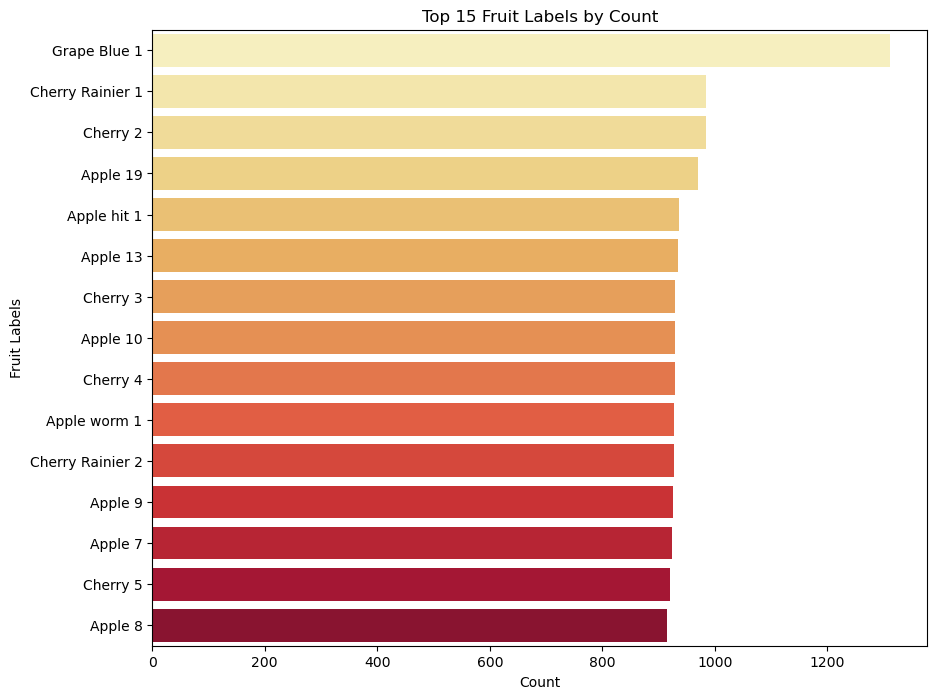

In [11]:
# Combine the training and test label counts into a single dictionary
combined_label_counts = {
    label: training_label_counts.get(label, 0) + test_label_counts.get(label, 0)
    for label in set(list(training_label_counts.keys()) + list(test_label_counts.keys()))
}

# Create a DataFrame to hold the combined fruit counts
df_fruit_counts = pd.DataFrame({"Fruit Labels": list(combined_label_counts.keys()), "Count": list(combined_label_counts.values())})

# Sort the DataFrame by the counts in descending order
df_fruit_counts = df_fruit_counts.sort_values(by="Count", ascending=False)

# Select the top 15 fruit labels by count
top_15_fruits = df_fruit_counts.head(15)

# Plot the horizontal bar chart using Seaborn
plt.figure(figsize=(10, 8))
sns.barplot(x="Count", y="Fruit Labels", data=top_15_fruits, palette="YlOrRd")
plt.xlabel("Count")
plt.ylabel("Fruit Labels")
plt.title("Top 15 Fruit Labels by Count")
plt.show()


In [26]:
#defining important variables 
BATCH_SIZE = 32
IMAGE_SIZE = 100
CHANNELS = 3
EPOCHS = 15

In [27]:
# training dataset pipeline
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_subset,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 35523 files belonging to 67 classes.


In [28]:
#print training labels
tr_class_names = train_dataset.class_names
tr_class_names

['Apple 10',
 'Apple 11',
 'Apple 12',
 'Apple 13',
 'Apple 14',
 'Apple 17',
 'Apple 18',
 'Apple 19',
 'Apple 5',
 'Apple 6',
 'Apple 7',
 'Apple 8',
 'Apple 9',
 'Apple Braeburn 1',
 'Apple Core 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple Rotten 1',
 'Apple hit 1',
 'Apple worm 1',
 'Banana 1',
 'Banana 3',
 'Banana 4',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry 3',
 'Cherry 4',
 'Cherry 5',
 'Cherry Rainier 1',
 'Cherry Rainier 2',
 'Cherry Rainier 3',
 'Cherry Sour 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Red 2',
 'Cherry Wax Red 3',
 'Cherry Wax Yellow 1',
 'Cherry Wax not ripen 1',
 'Cherry Wax not ripen 2',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',


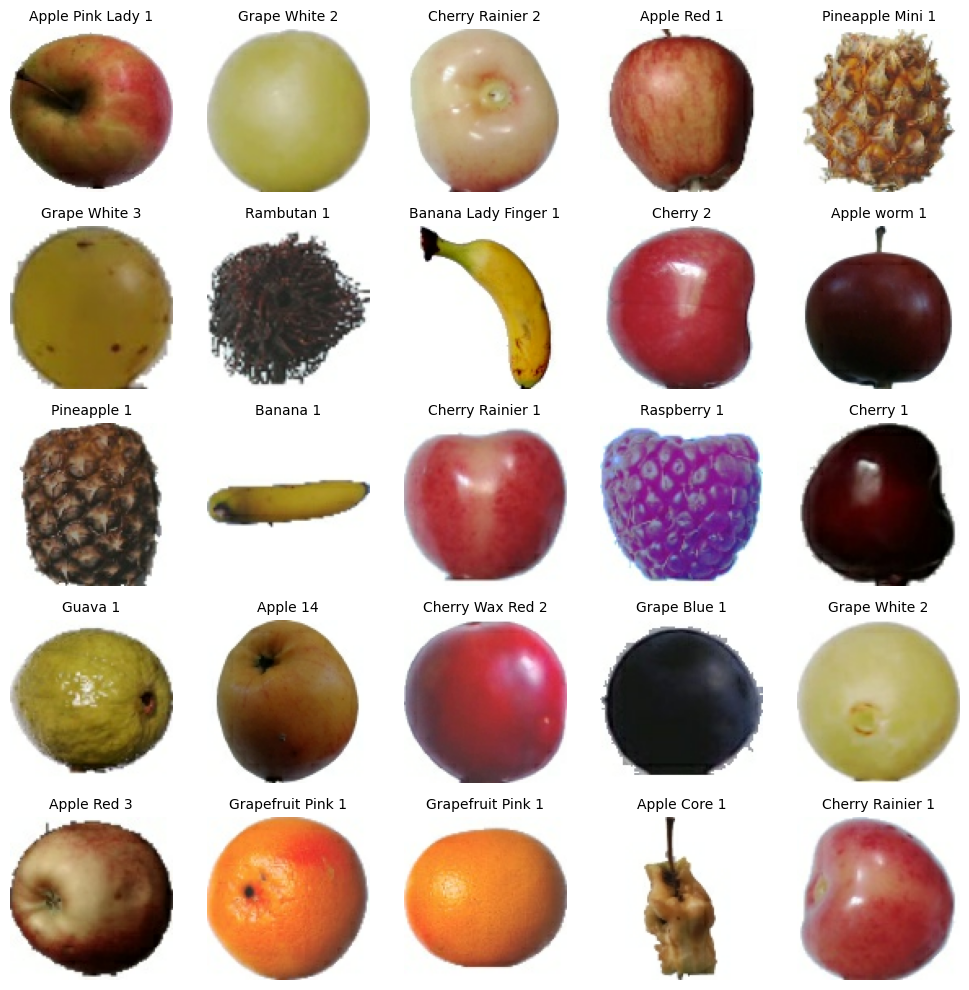

In [30]:
#visualizing sample images from the dataset
plt.figure(figsize=(10, 10))
for image_batch, labels_batch in train_dataset.take(9):
    for i in range(25):
        ax = plt.subplot(5,5, i + 1)
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(tr_class_names[labels_batch[i]], fontsize=10)
        plt.axis("off")

plt.tight_layout()
plt.show()

In [31]:
# define a function to split the dataset 
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.2, shuffle=True, shuffle_size=10000):
    assert (train_split + val_split) == 1

    ds_size = len(ds)

    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=1234)

    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)

    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)

    return train_ds, val_ds

In [32]:
train_ds, val_ds = get_dataset_partitions_tf(train_dataset)

In [33]:
#print length of each set
print("Training dataset length",len(train_ds))
print("Validation dataset length",len(val_ds))

Training dataset length 888
Validation dataset length 222


In [34]:
# Optimization for Training and Validation Datasets by caching and shuffling (using Autotune)
train_ds = train_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(100).prefetch(buffer_size=tf.data.AUTOTUNE)

In [35]:
# resize and rescaling images to a specified size 
resize_and_rescale = tf.keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

In [36]:
# prefetching the training data to optimize pipeline
train_ds = train_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

In [37]:
# Defining the shape of the input data batch for CNN
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)

# Number of outputs
n_classes = len(tr_class_names)
n_classes

67

In [38]:
# Now Defining the CNN model
model = Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, kernel_size =(3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [39]:
# Review the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_2 (Sequential)   (32, 100, 100, 3)         0         
                                                                 
 conv2d_5 (Conv2D)           (32, 98, 98, 32)          896       
                                                                 
 max_pooling2d_5 (MaxPoolin  (32, 49, 49, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (32, 47, 47, 32)          9248      
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 23, 23, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 21, 21, 64)         

In [40]:
# specifying the optimizer and model metrics and compiling the model
model.compile(
    optimizer='rmsprop',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

In [41]:
# saving the model training history
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=EPOCHS
)

Epoch 1/15
888/888 [==============================] - 293s 309ms/step - loss: 1.0477 - accuracy: 0.6820 - val_loss: 0.1486 - val_accuracy: 0.9423
Epoch 2/15
888/888 [==============================] - 285s 321ms/step - loss: 0.1670 - accuracy: 0.9395 - val_loss: 0.0418 - val_accuracy: 0.9796
Epoch 3/15
888/888 [==============================] - 294s 331ms/step - loss: 0.0936 - accuracy: 0.9649 - val_loss: 0.0649 - val_accuracy: 0.9703
Epoch 4/15
888/888 [==============================] - 302s 340ms/step - loss: 0.0697 - accuracy: 0.9734 - val_loss: 0.0242 - val_accuracy: 0.9889
Epoch 5/15
888/888 [==============================] - 264s 297ms/step - loss: 0.0588 - accuracy: 0.9778 - val_loss: 0.0255 - val_accuracy: 0.9896
Epoch 6/15
888/888 [==============================] - 278s 313ms/step - loss: 0.0509 - accuracy: 0.9806 - val_loss: 0.0191 - val_accuracy: 0.9907
Epoch 7/15
888/888 [==============================] - 266s 299ms/step - loss: 0.0445 - accuracy: 0.9841 - val_loss: 0.0252 -

In [51]:
from sklearn.metrics import classification_report, confusion_matrix
for images_batch, labels_batch in val_ds.take(1):
    ...
class_names = tr_class_names
y_true = [tr_class_names[label] for label in labels_batch]
y_pred = [tr_class_names[np.argmax(pred)] for pred in model.predict(images_batch)]
print(classification_report(y_true , y_pred))
print(confusion_matrix(y_true, y_pred))

1/1 [==============================] - 1s 552ms/step
                       precision    recall  f1-score   support

             Apple 11       1.00      1.00      1.00         1
             Apple 14       1.00      1.00      1.00         1
             Apple 17       1.00      1.00      1.00         1
             Apple 18       1.00      1.00      1.00         1
              Apple 6       1.00      1.00      1.00         1
              Apple 9       1.00      1.00      1.00         1
     Apple Braeburn 1       1.00      1.00      1.00         1
 Apple Crimson Snow 1       1.00      1.00      1.00         1
       Apple Golden 1       1.00      1.00      1.00         1
       Apple Golden 2       1.00      1.00      1.00         1
       Apple Golden 3       1.00      1.00      1.00         1
 Apple Granny Smith 1       1.00      1.00      1.00         1
    Apple Pink Lady 1       1.00      1.00      1.00         1
Apple Red Delicious 1       1.00      1.00      1.00         1
 

In [80]:
# Generate the classification report as a dictionary
report_dict = classification_report(y_true, y_pred, output_dict=True)

# Convert it to a pandas DataFrame for better formatting
report_df = pd.DataFrame(report_dict).transpose()

# Display the table
print(report_df)

                       precision  recall  f1-score  support
Apple 11                     1.0     1.0       1.0      1.0
Apple 14                     1.0     1.0       1.0      1.0
Apple 17                     1.0     1.0       1.0      1.0
Apple 18                     1.0     1.0       1.0      1.0
Apple 6                      1.0     1.0       1.0      1.0
Apple 9                      1.0     1.0       1.0      1.0
Apple Braeburn 1             1.0     1.0       1.0      1.0
Apple Crimson Snow 1         1.0     1.0       1.0      1.0
Apple Golden 1               1.0     1.0       1.0      1.0
Apple Golden 2               1.0     1.0       1.0      1.0
Apple Golden 3               1.0     1.0       1.0      1.0
Apple Granny Smith 1         1.0     1.0       1.0      1.0
Apple Pink Lady 1            1.0     1.0       1.0      1.0
Apple Red Delicious 1        1.0     1.0       1.0      1.0
Apple Red Yellow 2           1.0     1.0       1.0      1.0
Apple hit 1                  1.0     1.0

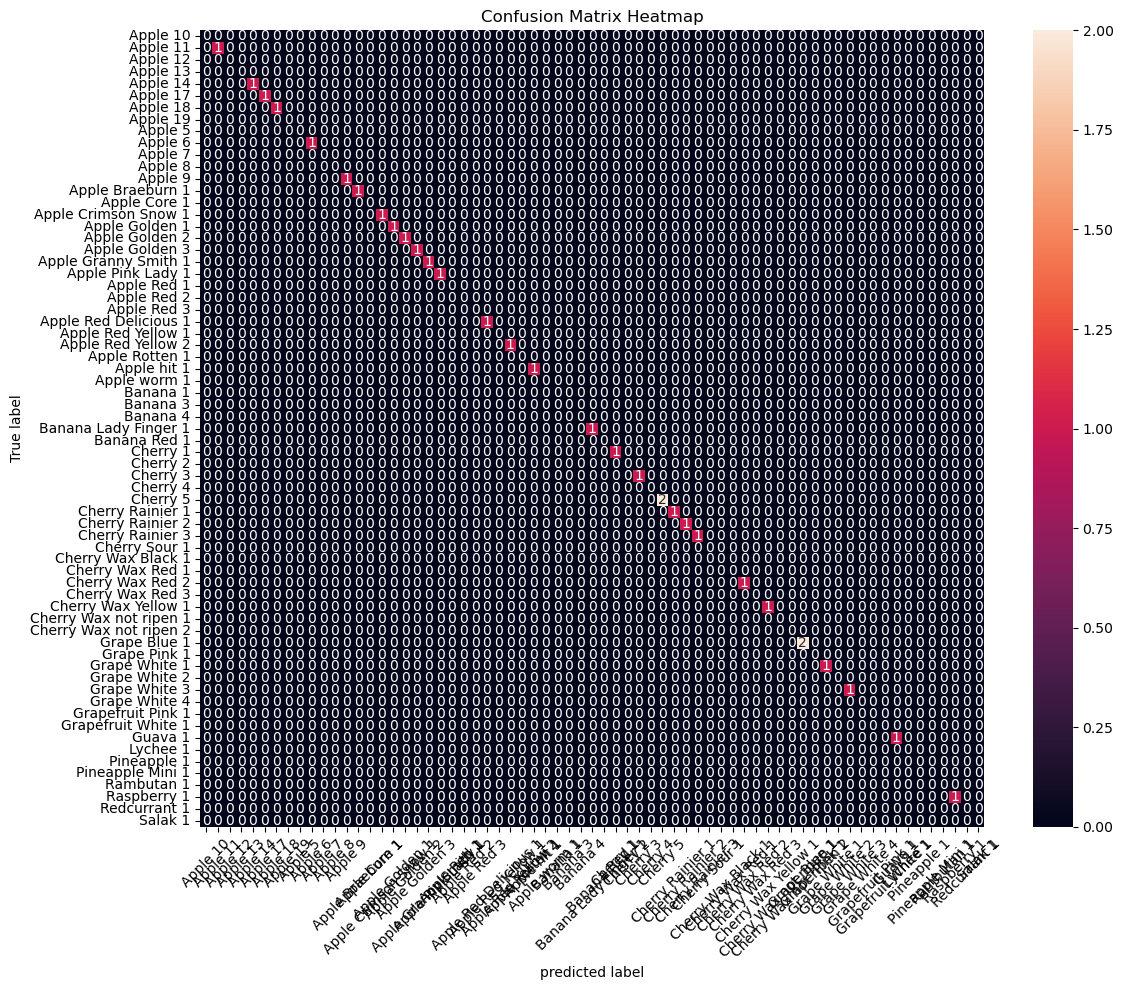

In [57]:
#plotting heatmap
cm = confusion_matrix(y_true, y_pred , labels = tr_class_names)
plt.figure(figsize=(12,10))
sns.heatmap(cm ,annot = True , fmt = 'd' ,xticklabels=tr_class_names , yticklabels= tr_class_names)
plt.xlabel('predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix Heatmap')
plt.xticks(rotation = 45)
plt.yticks(rotation = 0)
plt.tight_layout()
plt.show()

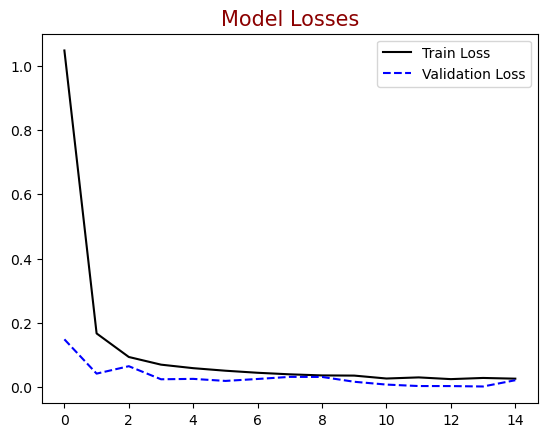

In [58]:
#Plotting train & validation loss
plt.figure()
plt.plot(history.history["loss"],label = "Train Loss", color = "black")
plt.plot(history.history["val_loss"],label = "Validation Loss", color = "blue", linestyle="dashed")
plt.title("Model Losses", color = "darkred", size = 15)
plt.legend()
plt.show()

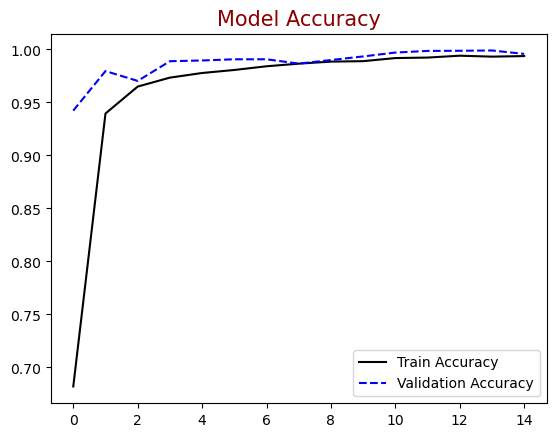

In [59]:
#Plotting train & validation accuracy
plt.figure()
plt.plot(history .history["accuracy"],label = "Train Accuracy", color = "black")
plt.plot(history .history["val_accuracy"],label = "Validation Accuracy", color = "blue", linestyle="dashed")
plt.title("Model Accuracy", color = "darkred", size = 15)
plt.legend()
plt.show()

In [60]:
#Predicting unseen images from test dataset
#Creating a test data pipeline
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
   test_subset,
    seed=42,
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE
)

Found 11834 files belonging to 67 classes.


In [61]:
#print training labels
ts_class_names = test_dataset.class_names
ts_class_names

['Apple 10',
 'Apple 11',
 'Apple 12',
 'Apple 13',
 'Apple 14',
 'Apple 17',
 'Apple 18',
 'Apple 19',
 'Apple 5',
 'Apple 6',
 'Apple 7',
 'Apple 8',
 'Apple 9',
 'Apple Braeburn 1',
 'Apple Core 1',
 'Apple Crimson Snow 1',
 'Apple Golden 1',
 'Apple Golden 2',
 'Apple Golden 3',
 'Apple Granny Smith 1',
 'Apple Pink Lady 1',
 'Apple Red 1',
 'Apple Red 2',
 'Apple Red 3',
 'Apple Red Delicious 1',
 'Apple Red Yellow 1',
 'Apple Red Yellow 2',
 'Apple Rotten 1',
 'Apple hit 1',
 'Apple worm 1',
 'Banana 1',
 'Banana 3',
 'Banana 4',
 'Banana Lady Finger 1',
 'Banana Red 1',
 'Cherry 1',
 'Cherry 2',
 'Cherry 3',
 'Cherry 4',
 'Cherry 5',
 'Cherry Rainier 1',
 'Cherry Rainier 2',
 'Cherry Rainier 3',
 'Cherry Sour 1',
 'Cherry Wax Black 1',
 'Cherry Wax Red 1',
 'Cherry Wax Red 2',
 'Cherry Wax Red 3',
 'Cherry Wax Yellow 1',
 'Cherry Wax not ripen 1',
 'Cherry Wax not ripen 2',
 'Grape Blue 1',
 'Grape Pink 1',
 'Grape White 1',
 'Grape White 2',
 'Grape White 3',
 'Grape White 4',


first image to predict
actual label: Grape Blue 1
1/1 [==============================] - 0s 95ms/step
predicted label: Grape Blue 1


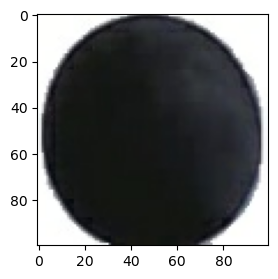

In [62]:
#Predicting a sample image
# Fetching model predictions for sample image in test dataset
plt.figure(figsize=(3, 3))
for images_batch, labels_batch in test_dataset.take(1):

    first_image = images_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",ts_class_names[first_label])

    batch_prediction = model.predict(images_batch)
    print("predicted label:",tr_class_names[np.argmax(batch_prediction[0])])

In [63]:
# Defining prediction function for testing images
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = ts_class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 33ms/step


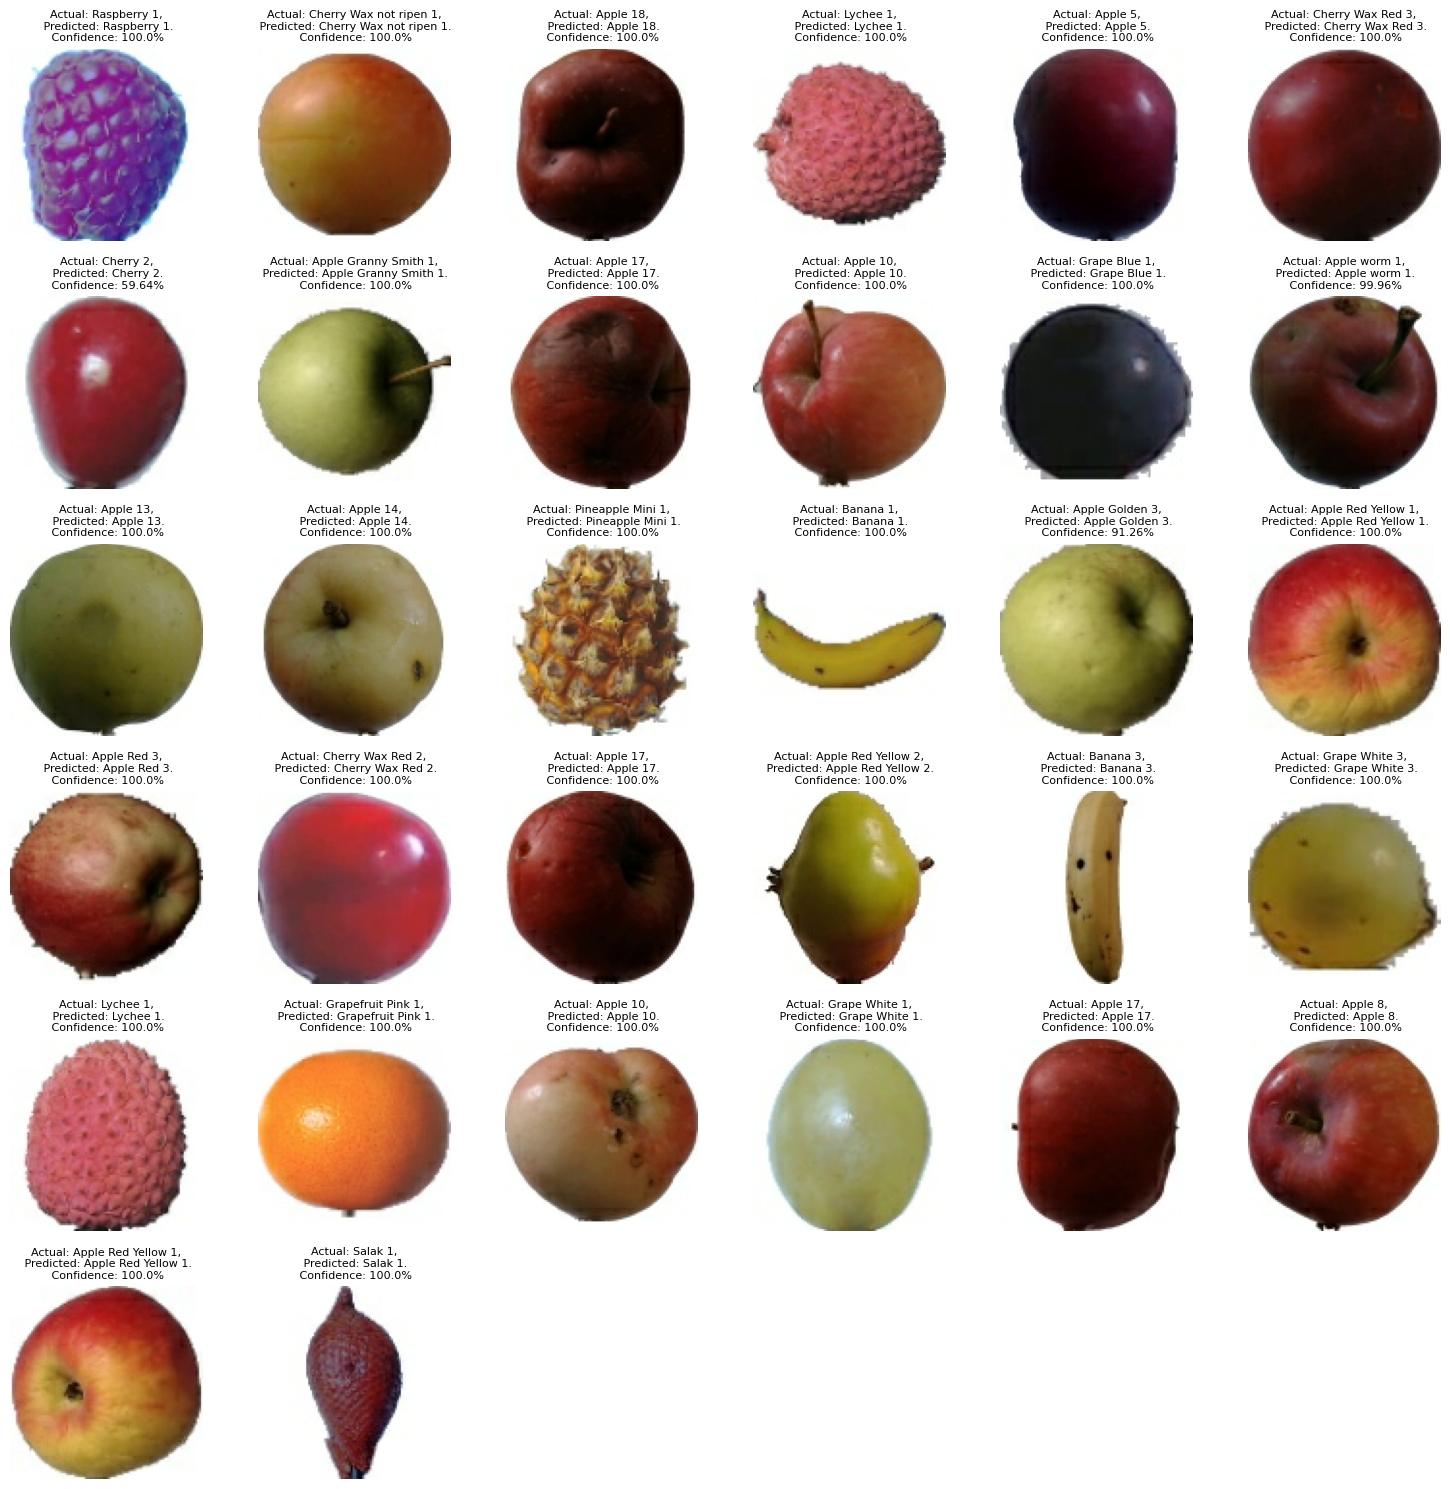

In [68]:
#TAKING A SET FOR PREDICTION :
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
batch_size = 32
for images, labels in test_dataset.take(12):
    for i in range(batch_size):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= batch_size - 1:
        break

# Hide any empty subplots
for i in range(i + 1, batch_size):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 25ms/step


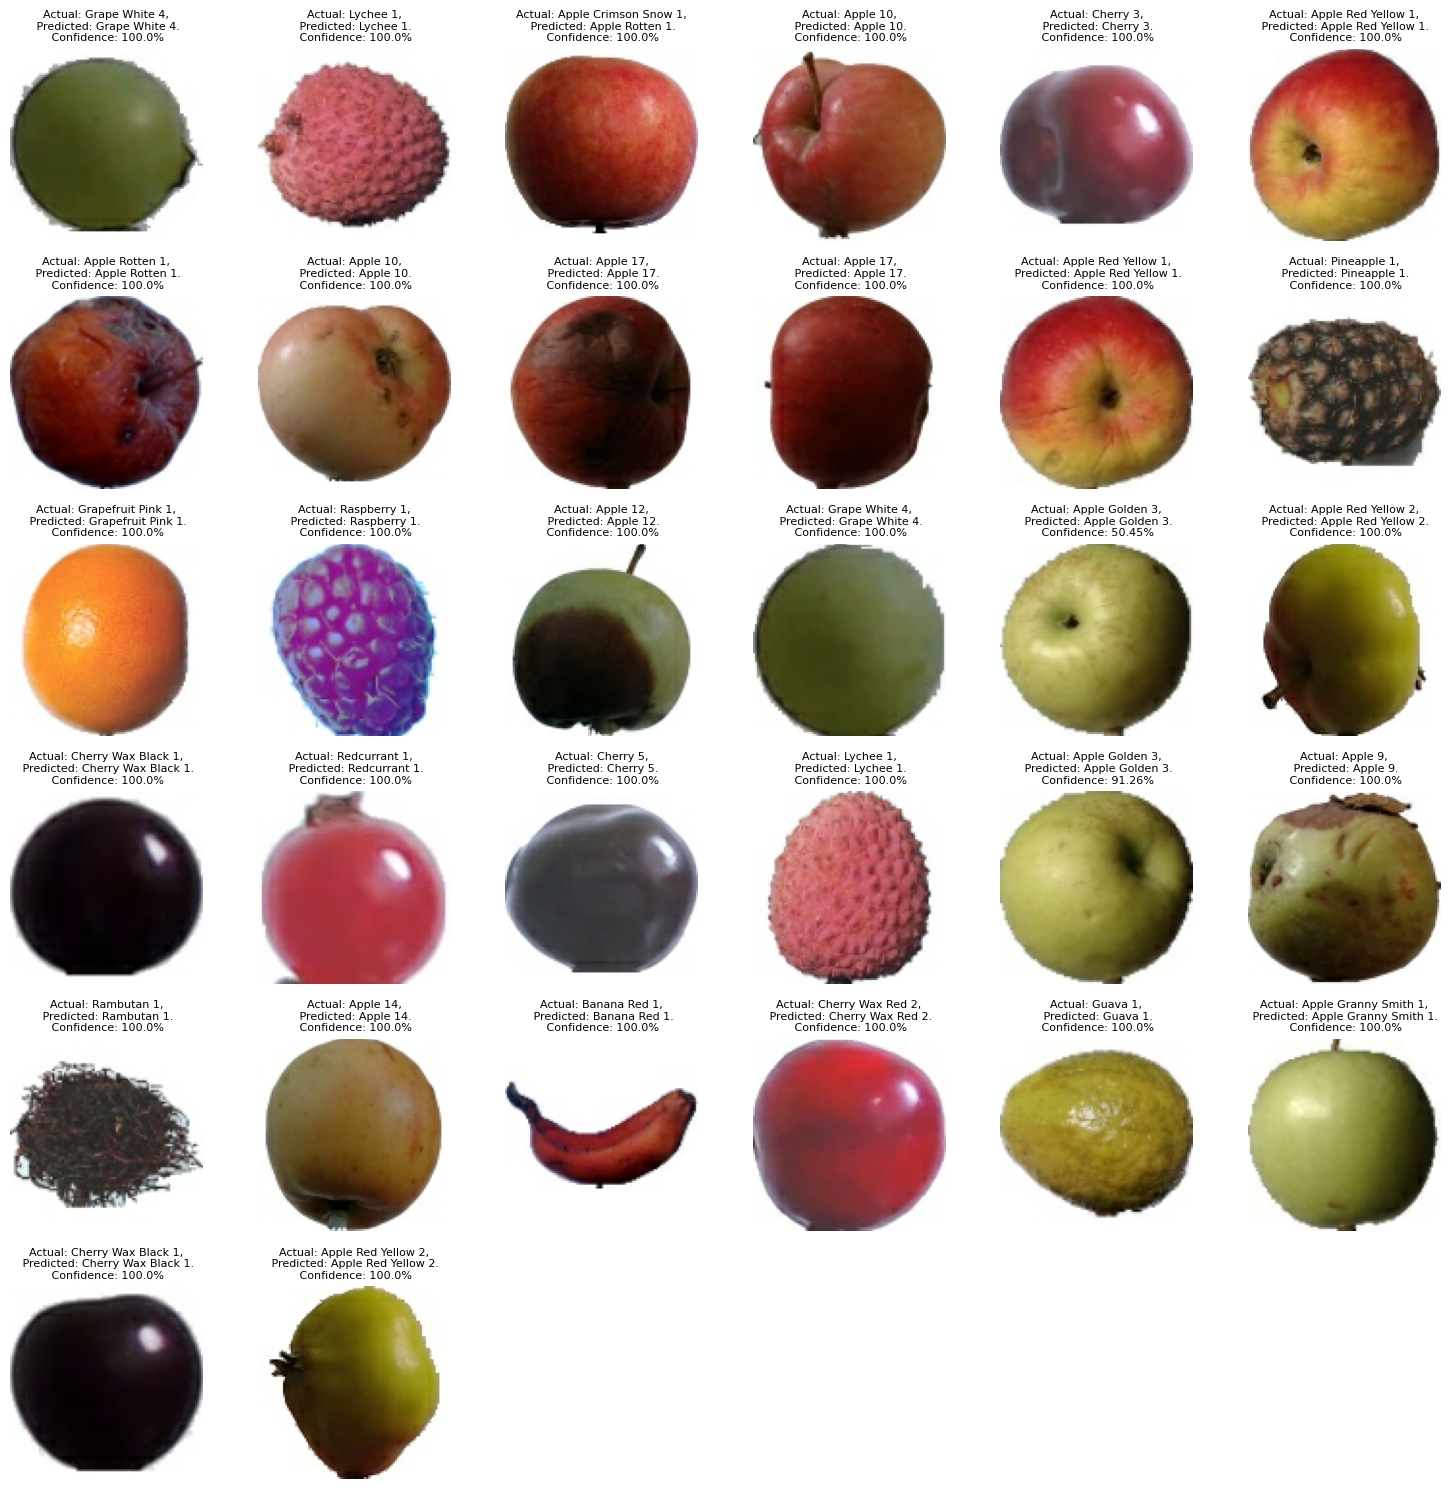

In [73]:
# TAKING ONE MORE SET :
plt.figure(figsize=(15, 15))

# Iterate over the batches and then the images to display their predictions
batch_size = 32
for images, labels in test_dataset.take(15):
    for i in range(batch_size):
        if i >= len(images):
            break

        ax = plt.subplot(6, 6, i + 1)
        image = tf.image.resize(images[i], (100, 100))
        plt.imshow(image.numpy().astype("uint8"))
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = ts_class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%", fontsize=8)
        plt.axis("off")

    # If there are more than batch size images, break out of the loop
    if i >= batch_size - 1:
        break

# Hide any empty subplots
for i in range(i + 1, batch_size):
    plt.subplot(6,6, i + 1)
    plt.axis("off")

plt.tight_layout()
plt.show()